In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


**Loading Dataset**

The dataset is loaded by mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_dir_train = pathlib.Path('gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train')
data_dir_test = pathlib.Path('gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Creating dataset**

The dataset is prepared for model building by
resizing(reducing the image size)
and dividing the traiing data further into training and validation datasets


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_df=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
validation_df=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
class_names=train_df.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualizing the data ie types of skin cancer**

To see one instance of all nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt

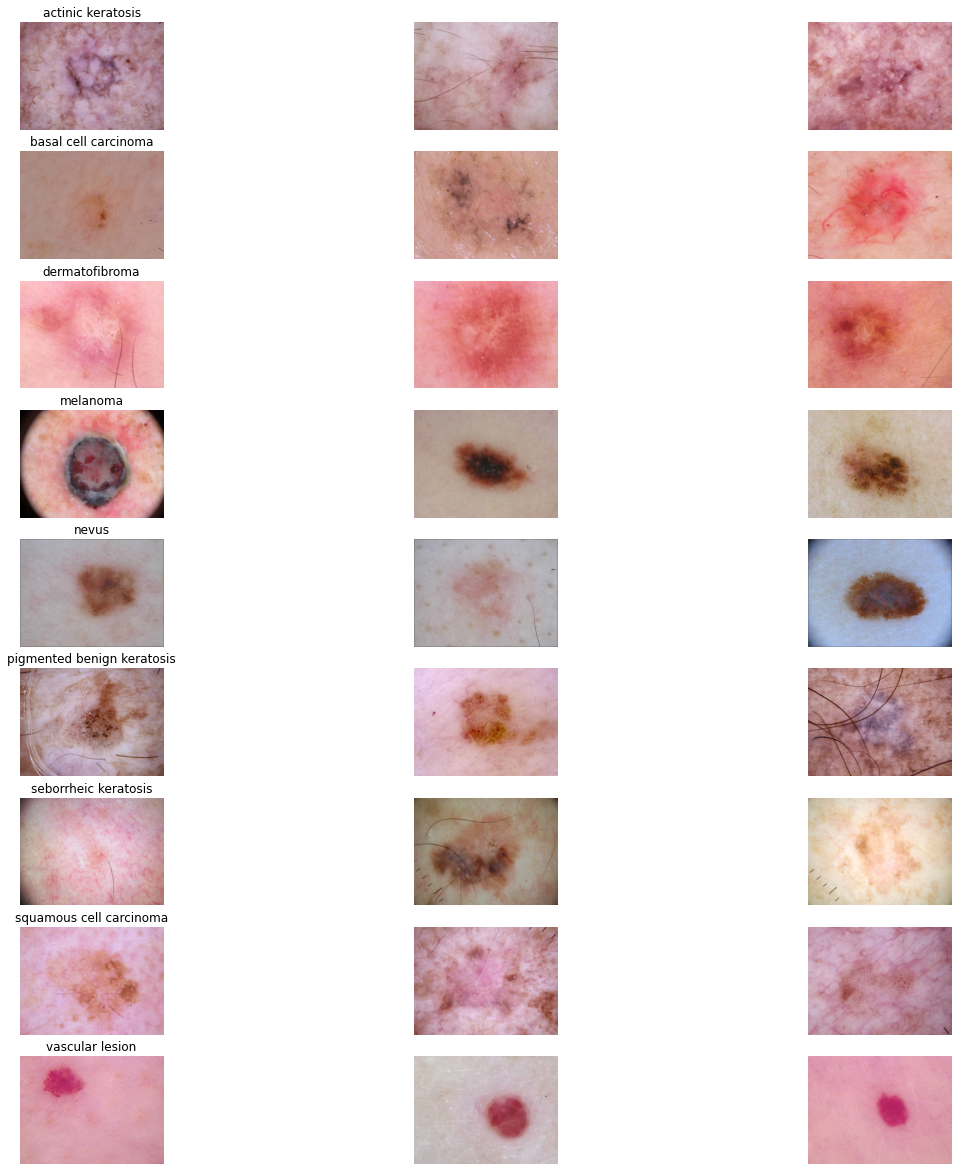

In [ ]:
fig, axes= plt.subplots(9,3, figsize=(20,21))
for targetclass, row_axis  in zip(class_names, axes):
    row_axis[0].set_title(targetclass)
    data_dir_path = os.path.join(data_dir_train, targetclass, '*')
    data_dir_path = glob.glob(data_dir_path)
    for col_axis, i in zip(row_axis, list(range(3))):
      image = io.imread(data_dir_path[i])
      col_axis.imshow(image)
      col_axis.axis('off')


In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_df=train_df.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_df=validation_df.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

 **Base model building**

Building intial model without dropouts or regularization to familiarize onself with dataset and model requirements.

In [ ]:
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(
    scale=1./255, offset=0.0
))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu' ))
model.add(Dense(64, activation='relu' ))
model.add(Dense(32, activation='relu' ))


model.add(Dense(9, activation='softmax'))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Training the model**

In [ ]:
epochs = 20
history = model.fit(
    train_df,
    validation_data = validation_df,
    epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 89ms/step - loss: 0.3517 - accuracy: 0.8661 - val_loss: 2.9541 - val_accuracy: 0.4720
Epoch 2/20
56/56 [==============================] - 5s 89ms/step - loss: 0.3862 - accuracy: 0.8655 - val_loss: 3.6060 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 5s 89ms/step - loss: 0.4055 - accuracy: 0.8493 - val_loss: 2.7972 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 5s 90ms/step - loss: 0.2902 - accuracy: 0.8923 - val_loss: 2.9691 - val_accuracy: 0.4631
Epoch 5/20
56/56 [==============================] - 5s 90ms/step - loss: 0.2361 - accuracy: 0.9035 - val_loss: 3.6503 - val_accuracy: 0.4765
Epoch 6/20
56/56 [==============================] - 5s 91ms/step - loss: 0.1837 - accuracy: 0.9263 - val_loss: 3.5842 - val_accuracy: 0.4720
Epoch 7/20
56/56 [==============================] - 5s 91ms/step - loss: 0.1557 - accuracy: 0.9252 - val_loss: 4.2296 - val_accuracy: 0.5056
Epoch 8/20
56

In [ ]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_27 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 176, 176, 32)      9248      
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 174, 174, 32)      9248      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 87, 87, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 83, 83, 64)      

**Visualizing training results**


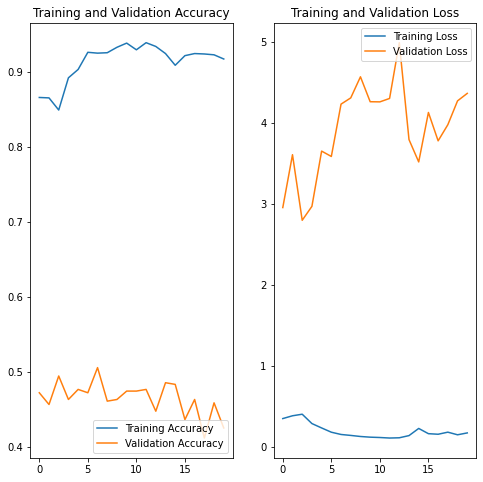

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**



*   The model accuracy is quite high (91%)
*   clear case of overfitting
*   training accuracy is far higher than validation accuracy
*   Need to deal with overfitting by data augmentation and dropouts



**Data Augumentaion**

Increasing the datapoints by add valid modified version of old datapoints 

In [ ]:
data_aug = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(10),
  layers.experimental.preprocessing.RandomZoom(0.2),
]
)

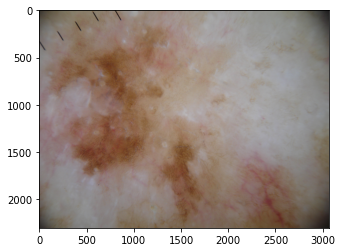

In [ ]:
import glob
from skimage import io
data_dir_path = os.path.join(data_dir_train, class_names[3], '*')
data_dir_path = glob.glob(data_dir_path)

image = io.imread(data_dir_path[83])
plt.imshow(image)


In [ ]:
image = tf.expand_dims(image,0)

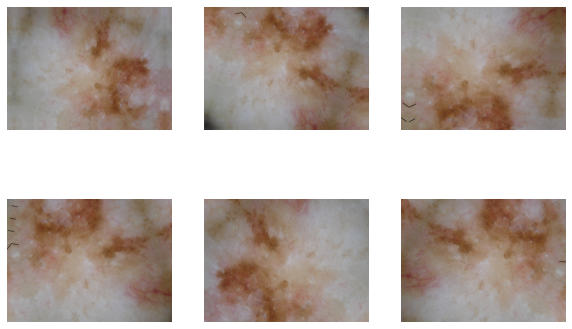

In [ ]:
plt.figure(figsize=(10,10))
for i in range(6):
  aug_image = data_aug(image)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(aug_image[0])
  plt.axis("off")


**Second model with augumentation layer**

In [ ]:
model = Sequential([
    data_aug,
    tf.keras.layers.experimental.preprocessing.Rescaling(
    scale=1./255, offset=0.0
    ),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(180,180,3)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.Dropout(0.2),

    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    

    layers.Dense(9, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
    train_df,
    validation_data = validation_df,
    epochs=epochs
)

56/56 [==============================] - 5s 85ms/step - loss: 1.7499 - accuracy: 0.3638 - val_loss: 1.7620 - val_accuracy: 0.3557
Epoch 5/20
56/56 [==============================] - 5s 86ms/step - loss: 1.6692 - accuracy: 0.4007 - val_loss: 1.6157 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 5s 85ms/step - loss: 1.6092 - accuracy: 0.4280 - val_loss: 1.4620 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 5s 85ms/step - loss: 1.4898 - accuracy: 0.4794 - val_loss: 1.4499 - val_accuracy: 0.5011
Epoch 8/20
56/56 [==============================] - 5s 86ms/step - loss: 1.5569 - accuracy: 0.4436 - val_loss: 1.4830 - val_accuracy: 0.4832
Epoch 9/20
56/56 [==============================] - 5s 86ms/step - loss: 1.4262 - accuracy: 0.5045 - val_loss: 1.5178 - val_accuracy: 0.4676
Epoch 10/20
56/56 [==============================] - 5s 86ms/step - loss: 1.4680 - accuracy: 0.4654 - val_loss: 1.4690 - val_accuracy: 0.4877
Epoch 11/20
56/56 [====

**Visualizing model performance**

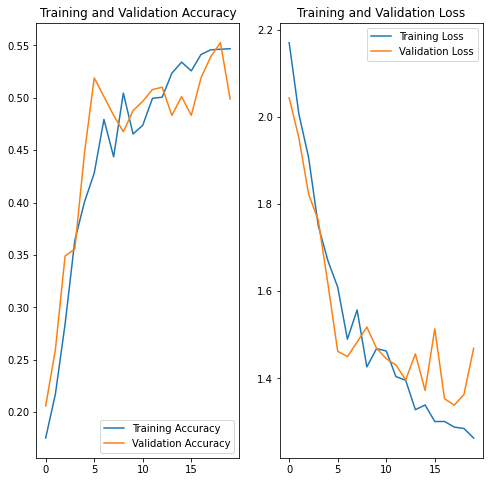

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:

*   Overfitting is resolved
*   model performance is not satisfactory.




**Class Distribution**


Checking class images count to see if datapoints are evenly distributed

In [ ]:
for targetclass in class_names:
  class_dir = os.path.join(data_dir_train, targetclass, '*')
  print(targetclass, len(glob.glob(class_dir)))


actinic keratosis 114
basal cell carcinoma 376
dermatofibroma 95
melanoma 438
nevus 357
pigmented benign keratosis 462
seborrheic keratosis 77
squamous cell carcinoma 181
vascular lesion 139


**pigmented benign keratosis**, **melanoma** classes has maximum number of data points





**seborrheic keratosis**, **dermafibroma** classes has lowest number of data points


**Handling Class Imbalance**

In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor
path_to_training_dataset='gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/'

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F96AEF62B50>:   0%|          | 1/500 [00:00<01:07,  7.34 Samples/s]                  

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F96AEF6D610>: 100%|██████████| 500/500 [00:18<00:00, 26.62 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F970DC3FA50>: 100%|██████████| 500/500 [00:19<00:00, 25.81 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F96B1FE24D0>: 100%|██████████| 500/500 [00:19<00:00, 25.60 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F952CB36A90>: 100%|██████████| 500/500 [01:36<00:00,  5.18 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F94283908D0>:   0%|          | 1/500 [00:00<01:00,  8.27 Samples/s]

Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F970DA34850>: 100%|██████████| 500/500 [01:22<00:00,  6.06 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F952F874310>: 100%|██████████| 500/500 [00:18<00:00, 26.45 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9429E48E10>: 100%|██████████| 500/500 [00:39<00:00, 12.52 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F942713C950>: 100%|██████████| 500/500 [00:18<00:00, 27.36 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/SkincancerISICTheInternationalSkinImagingCollaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9428383750>: 100%|██████████| 500/500 [00:18<00:00, 26.87 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Augmented data distribution**

In [ ]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2['Label'].value_counts()

pigmented benign keratosis    500
actinic keratosis             500
seborrheic keratosis          500
dermatofibroma                500
vascular lesion               500
squamous cell carcinoma       500
nevus                         500
basal cell carcinoma          500
melanoma                      500
Name: Label, dtype: int64

**Final Model**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
model = Sequential([
    data_aug,
    tf.keras.layers.experimental.preprocessing.Rescaling(
    scale=1./255, offset=0.0
    ),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(180,180,3)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    layers.Dense(9, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
epochs = 30
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 41s 237ms/step - loss: 1.4237 - accuracy: 0.4560 - val_loss: 1.3110 - val_accuracy: 0.4878
Epoch 2/30
169/169 [==============================] - 42s 245ms/step - loss: 1.3678 - accuracy: 0.4661 - val_loss: 1.3132 - val_accuracy: 0.4744
Epoch 3/30
169/169 [==============================] - 42s 243ms/step - loss: 1.3171 - accuracy: 0.4881 - val_loss: 1.2530 - val_accuracy: 0.5004
Epoch 4/30
169/169 [==============================] - 41s 239ms/step - loss: 1.3129 - accuracy: 0.4881 - val_loss: 1.3071 - val_accuracy: 0.4855
Epoch 5/30
169/169 [==============================] - 42s 245ms/step - loss: 1.2821 - accuracy: 0.5009 - val_loss: 1.2996 - val_accuracy: 0.4662
Epoch 6/30
169/169 [==============================] - 43s 248ms/step - loss: 1.2850 - accuracy: 0.5057 - val_loss: 1.2886 - val_accuracy: 0.4967
Epoch 7/30
169/169 [==============================] - 43s 249ms/step - loss: 1.2151 - accuracy: 0.5282 - val_loss: 1.2215 - val_ac

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f97203228c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 2/30
105/169 [=================>............] - ETA: 13s - loss: 0.8277 - accuracy: 0.6792

KeyboardInterrupt: ignored

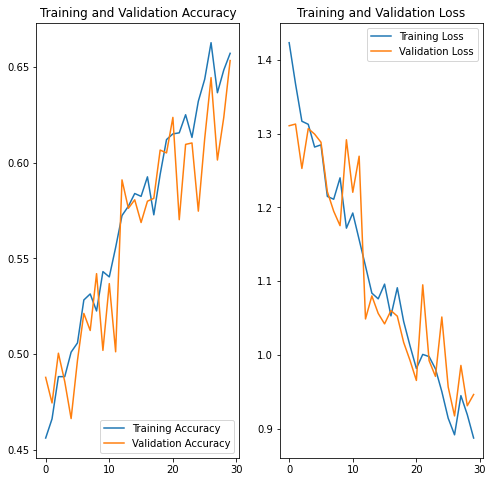

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



**After handling class imbalance model performance imporoved by 15%**


